(100, 1)
(100, 1)
data size torch.Size([100, 1])


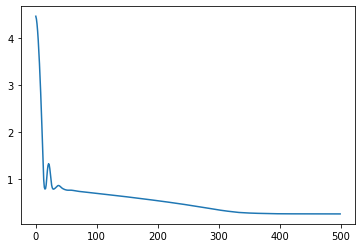

model first 5 output: tensor([[3.2200],
        [4.8207],
        [3.4327],
        [5.1170],
        [3.3270]], grad_fn=<SliceBackward0>) 
label: tensor([[3.2000],
        [4.6000],
        [3.1000],
        [5.0000],
        [3.6000]], grad_fn=<SliceBackward0>)
loss: 0.24671636521816254


In [29]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import sklearn
import pandas as pd
data = load_iris()
data.target[[110, 65, 50]] # 0-50 arasi 0, 51-100 1, 101-149 2 bunlar indis
list(data.target_names)

data,target = sklearn.datasets.load_iris(return_X_y=True, as_frame=False)

from sklearn.preprocessing import StandardScaler

x = data[0:50,(1,2)]
y = data[0:50,(0,1)]
x=x.reshape(-1, 1) 

print(x.shape)
y=y.reshape(-1, 1) 
print(y.shape)

#plt.plot(x,y,'ro')
#plt.show()

x = torch.tensor(x, requires_grad=True,dtype=torch.float)
y = torch.tensor(y, requires_grad=True,dtype=torch.float)


#2 Fully connected network   -------------------
# 13 feature > 512> 512 > 1
# loss function MSE (y-activation)^2
# activation function ReLU
# Self> model1 = Neural_Net(13,1)
print("data size {}".format(x.shape))

class Neural_Net(nn.Module):
    def __init__(self,input_size,hidden_size1,hidden_size2,output_size):
        super(Neural_Net,self).__init__()
        self.Linear1 = nn.Linear(input_size,hidden_size1)
        self.Linear2 = nn.Linear(hidden_size1,hidden_size2)
        self.Linear3 = nn.Linear(hidden_size2,output_size)
        self.activation = nn.Sigmoid()

    def forward(self,x):
        output = self.Linear1(x)
        output = self.activation(output)
        output = self.Linear2(output)
        output = self.activation(output)
        output = self.Linear3(output)

        # Consider adding activation function
        return output

model = Neural_Net(1,128,64,1)
# Training
criterion = nn.L1Loss()
epochs = 500
optimizer = torch.optim.SGD(model.parameters(),lr=0.003,momentum=0.9)
plot_loss=[]

for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(x)
    loss = criterion(output,y)
    loss.backward()
    optimizer.step()
    plot_loss.append(loss)

plot_array = [i.detach().numpy() for i in plot_loss]
plt.plot(range(epochs),plot_array )
plt.show()

print(f'model first 5 output: {output[5:10]} ')
print(f'label: {y[5:10]}')
print(f'loss: {loss}')

(50,)
(50,)


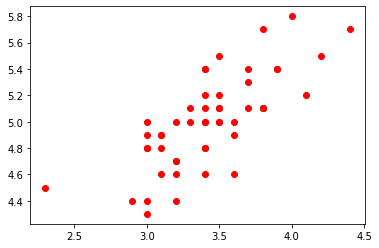

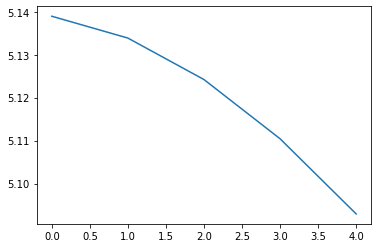

model first 5 output: tensor([[-0.0869],
        [-0.0879],
        [-0.0876],
        [-0.0865],
        [-0.0869]], grad_fn=<SliceBackward0>) 
label: tensor([[5.4000],
        [5.1000],
        [4.6000],
        [5.1000],
        [4.8000]], grad_fn=<SliceBackward0>)
loss: 5.092960357666016


In [13]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import sklearn
import pandas as pd
data = load_iris()
data.target[[110, 65, 50]] # 0-50 arasi 0, 51-100 1, 101-149 2 bunlar indis
list(data.target_names)

data,target = sklearn.datasets.load_iris(return_X_y=True, as_frame=False)

x = data[0:50,1]
y = data[0:50,0]
print(x.shape)
print(y.shape)

plt.plot(x,y,'ro')
plt.show()

x = torch.tensor(x, requires_grad=True,dtype=torch.float)
x = x.view(50,1)
y = torch.tensor(y, requires_grad=True,dtype=torch.float)
y = y.view(50,1)

class Neural_Net(nn.Module):
    def __init__(self,input_size,hidden_size,output_size):
        super(Neural_Net,self).__init__()
        self.Linear1 = nn.Linear(input_size,hidden_size)
        self.Linear2 = nn.Linear(hidden_size,hidden_size)
        self.Linear3 = nn.Linear(hidden_size,output_size)
        self.activation = nn.Sigmoid()

    def forward(self,x):
        output = self.Linear1(x)
        output = self.activation(output)
        output = self.Linear2(output)
        output = self.activation(output)
        output = self.Linear3(output)
        # Consider adding activation function
        return output

model = Neural_Net(1,2,1) 
# Training
criterion = nn.L1Loss()
epochs = 100
optimizer = torch.optim.SGD(model.parameters(),lr=0.003,momentum=0.9)
plot_loss=[]

for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(x)
    loss = criterion(output,y)
    loss.backward()
    optimizer.step()
    plot_loss.append(loss)

plot_array = [i.detach().numpy() for i in plot_loss]
plt.plot(range(epochs),plot_array )
plt.show()

print(f'model first 5 output: {output[20:25]} ')
print(f'label: {y[20:25]}')
print(f'loss: {loss}')

(50,)
(50,)


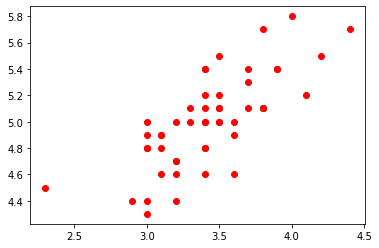

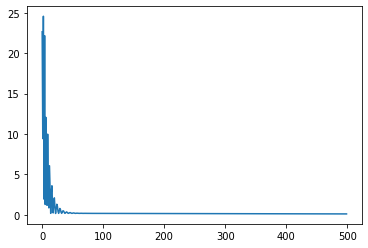

model first 5 output: tensor([[5.0040],
        [5.0478],
        [5.0335],
        [4.9890],
        [5.0040]], grad_fn=<SliceBackward0>) 
label: tensor([[5.4000],
        [5.1000],
        [4.6000],
        [5.1000],
        [4.8000]], grad_fn=<SliceBackward0>)
loss: 0.0961839109659195


In [15]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import sklearn
import pandas as pd
data = load_iris()
data.target[[110, 65, 50]] # 0-50 arasi 0, 51-100 1, 101-149 2 bunlar indis
list(data.target_names)

data,target = sklearn.datasets.load_iris(return_X_y=True, as_frame=False)

x = data[0:50,1]
y = data[0:50,0]
print(x.shape)
print(y.shape)

plt.plot(x,y,'ro')
plt.show()

x = torch.tensor(x, requires_grad=True,dtype=torch.float)
x = x.view(50,1)
y = torch.tensor(y, requires_grad=True,dtype=torch.float)
y = y.view(50,1)
# simdi bunda ayni seyleri deneriz

class Neural_Net(nn.Module):
    def __init__(self,input_size,hidden_size,output_size):
        super(Neural_Net,self).__init__()
        self.Linear1 = nn.Linear(input_size,hidden_size)
        self.Linear2 = nn.Linear(hidden_size,hidden_size)
        self.Linear4 = nn.Linear(hidden_size,output_size)
        self.activation = nn.Sigmoid()

    def forward(self,x):
        output = self.Linear1(x)
        output = self.activation(output)
        output = self.Linear2(output)
        output = self.activation(output)
        output = self.Linear4(output)
        # Consider adding activation function
        return output

model = Neural_Net(1,512,1) # belki giris 150 ??


# Training
criterion = nn.MSELoss()

epochs = 500

optimizer = torch.optim.SGD(model.parameters(),lr=0.003,momentum=0.9)
plot_loss=[]
all_outputs = []
for epoch in range(epochs):

    optimizer.zero_grad()
    output = model(x) # yeni data kucuk x
    loss = criterion(y,output)
    loss.backward()
    optimizer.step()
    plot_loss.append(loss)
    all_outputs.append(output)
plot_array = [i.detach().numpy() for i in plot_loss]
plt.plot(range(epochs),plot_array )
plt.show()

print(f'model first 5 output: {output[20:25]} ')
print(f'label: {y[20:25]}')
print(f'loss: {loss}')